In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [100]:
data=pd.read_csv(r"C:\Users\kunal  kumar  pandey\Downloads\archive (4)\Bengaluru_House_Data.csv")

In [101]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [102]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [103]:
data.shape

(13320, 9)

In [104]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

# Missing Value

In [105]:
data.isnull().sum().sort_values(ascending=False)

society         5502
balcony          609
bath              73
size              16
location           1
area_type          0
availability       0
total_sqft         0
price              0
dtype: int64

In [106]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [107]:
data["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [108]:
data.drop(['availability','society','balcony'],axis=1,inplace=True)

In [109]:
data.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [110]:
data.head(5)

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

In [111]:
data.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [112]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [113]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [114]:
data['location']=data['location'].fillna('Sarjapur Road')

In [115]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [116]:
data['size']=data['size'].fillna('2 BHK')

In [117]:
data['bath']=data['bath'].fillna(data['bath'].median())

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   size        13320 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [119]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### The category 4 Bedroom and 4BHK are same. To solve this let us create a new column BHK.

In [120]:
data['bhk'] = data['size'].apply(lambda x:int(x.split()[0]))
data['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### Looking the no of bedrooms we find entries like 43, 27 etc. let us look those rows

In [121]:
data[data.bhk>20]

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### 43 bedrooms at 2400sqft area doesn't make any sense. It is an error. Before cleaning this up I want to clean the total_sqft column.

In [122]:
 data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [123]:
def convertRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [124]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [125]:

data.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Feature Engineering

In [126]:
data['price_per_sqft']=data['price'] * 100000 / data['total_sqft']

In [127]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [128]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## explore location column.

In [129]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [130]:
data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [131]:
data['location']=data['location'].apply(lambda x: x.strip())
location_count=data['location'].value_counts()

In [132]:
location_count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [133]:
location_count_less_10=location_count[location_count<10]
location_count_less_10

Volagerekallahalli                    9
Medahalli                             9
Vishwanatha Nagenahalli               9
2nd Phase JP Nagar                    9
Chennammana Kere                      9
                                     ..
1Channasandra                         1
Hosahalli                             1
Vijayabank bank layout                1
near Ramanashree California resort    1
Abshot Layout                         1
Name: location, Length: 1041, dtype: int64

In [134]:
data['location']=data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [135]:
data['location'].value_counts()

other                  2756
Whitefield              541
Sarjapur  Road          399
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: location, Length: 255, dtype: int64

### HOW DOES THE 2 BHK AND 3 BHK PROPERTY PRICES LOOK LIKE

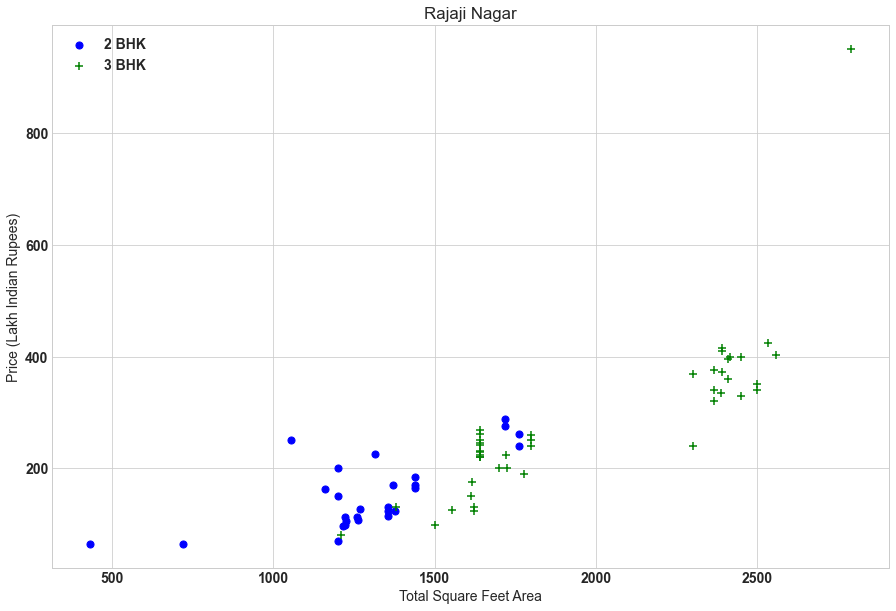

In [136]:
def plot_scatter_chart(data,location):
    bhk2 = data[(data.location==location) & (data.bhk==2)]
    bhk3 = data[(data.location==location) & (data.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Rajaji Nagar")

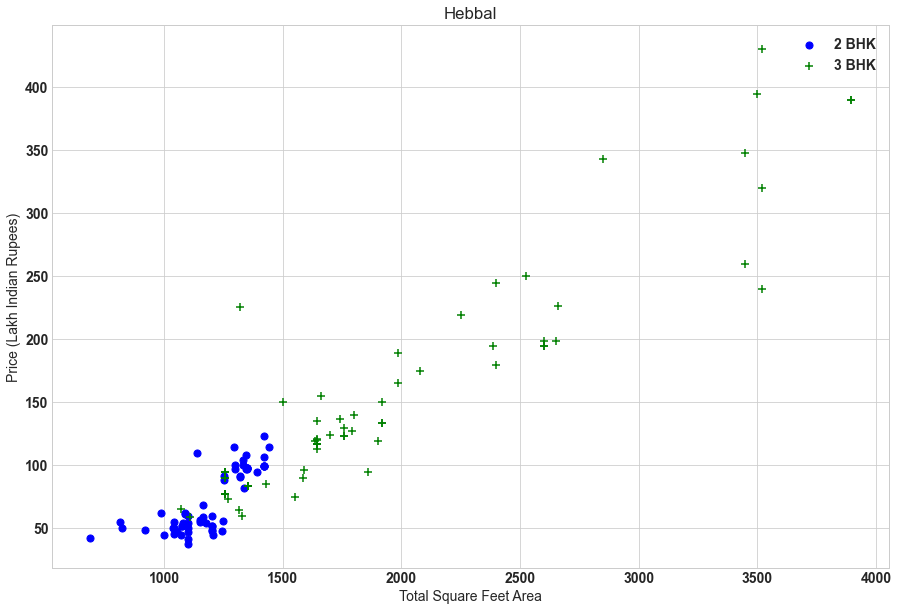

In [137]:
plot_scatter_chart(data,"Hebbal")

## Outlier detecation and removal

In [138]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [139]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

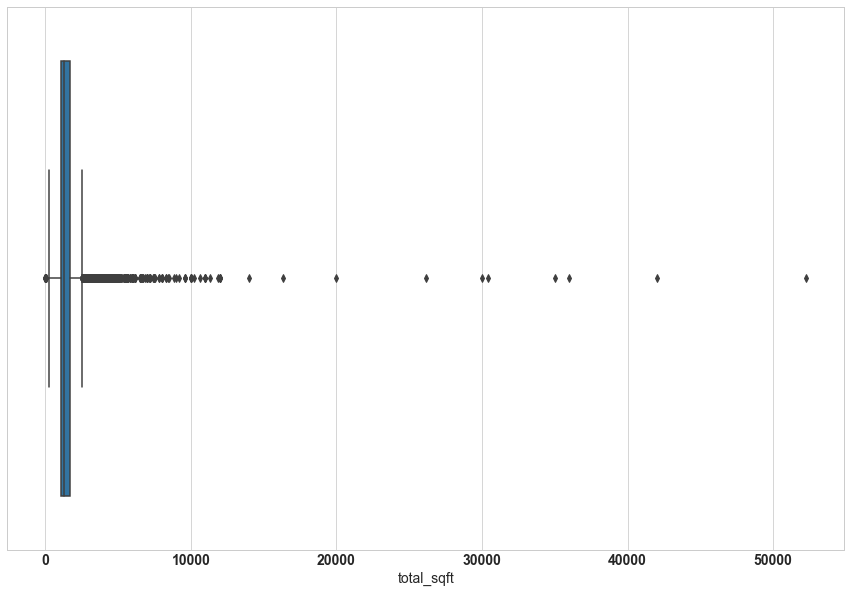

In [140]:
sns.boxplot(x='total_sqft',data=data)
plt.show()

In [141]:
# remover less than 300 sqft 
data=data[((data['total_sqft']/data['bhk']) >= 300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [142]:
data.shape

(12530, 8)

In [143]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

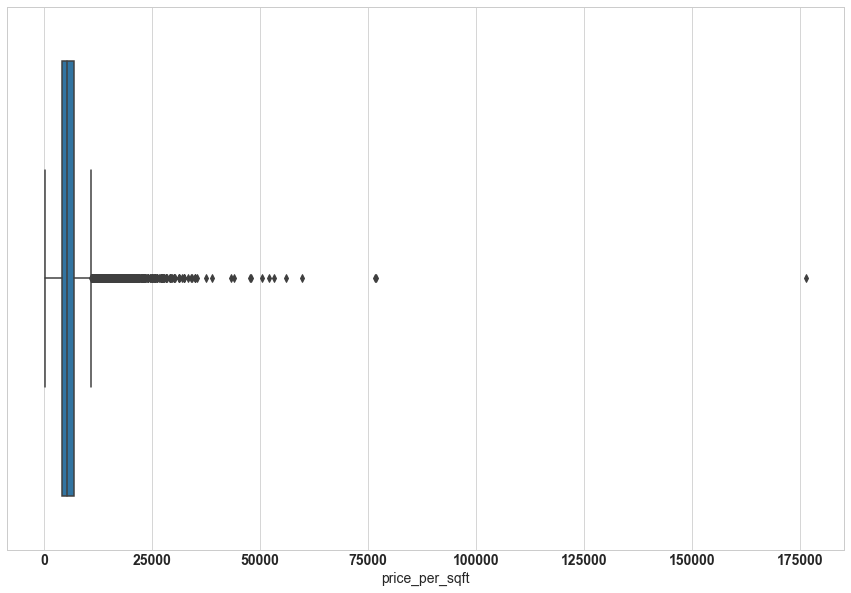

In [144]:
sns.boxplot(x='price_per_sqft',data=data)
plt.show()

### I am considering anything above or below 1 standard deviation as outlier. I need to group by location since each location has different price range.

In [145]:
def remove_outlier_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_output=pd.concat([df_output,gen_df], ignore_index=True)
    return df_output
data=remove_outlier_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000
mean,1509.996956,2.474032,91.718675,2.576347,5669.007067
std,883.210082,0.986908,88.327858,0.900592,2292.794131
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4249.917219
50%,1286.000000,2.000000,67.000000,2.000000,5176.565008
75%,1650.000000,3.000000,100.000000,3.000000,6431.808627
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [146]:
data.location.unique()

array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billek

### how does the 2 BHK and 3 BHK property prices look like

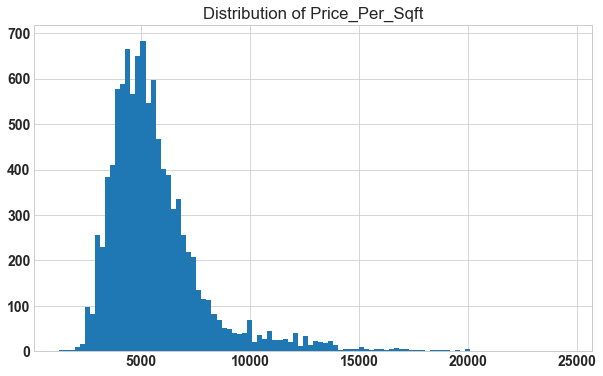

In [147]:
plt.figure(figsize=(10,6))
plt.hist(data["price_per_sqft"],bins=100)
plt.title("Distribution of Price_Per_Sqft")
plt.show()

### how does the 2 BHK and 3 BHK property prices look like

In [148]:
def bhk_outlier_remove(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk ,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk ,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index') 

In [149]:
data=bhk_outlier_remove(data)
data

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...
10273,Carpet Area,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10274,Super built-up Area,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10277,Super built-up Area,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10278,Plot Area,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


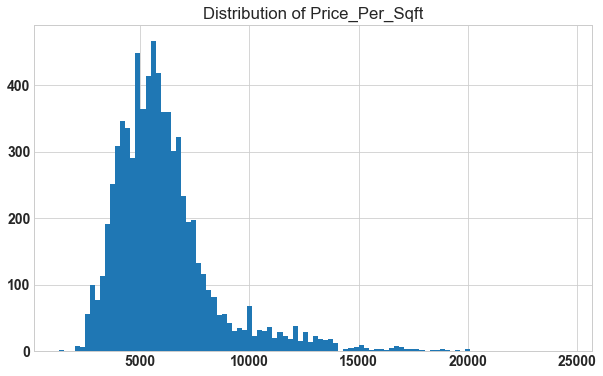

In [150]:
plt.figure(figsize=(10,6))
plt.hist(data["price_per_sqft"],bins=100)
plt.title("Distribution of Price_Per_Sqft")
plt.show()

In [151]:
def bhk_outlier_remove(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk ,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk ,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')    

In [152]:
data=bhk_outlier_remove(data)
data

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...
10273,Carpet Area,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10274,Super built-up Area,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10277,Super built-up Area,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10278,Plot Area,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


### VISUALIZE PRICE_PER_SQFT FOR 2 BHK AND 3 BHK PROPERTIES¶

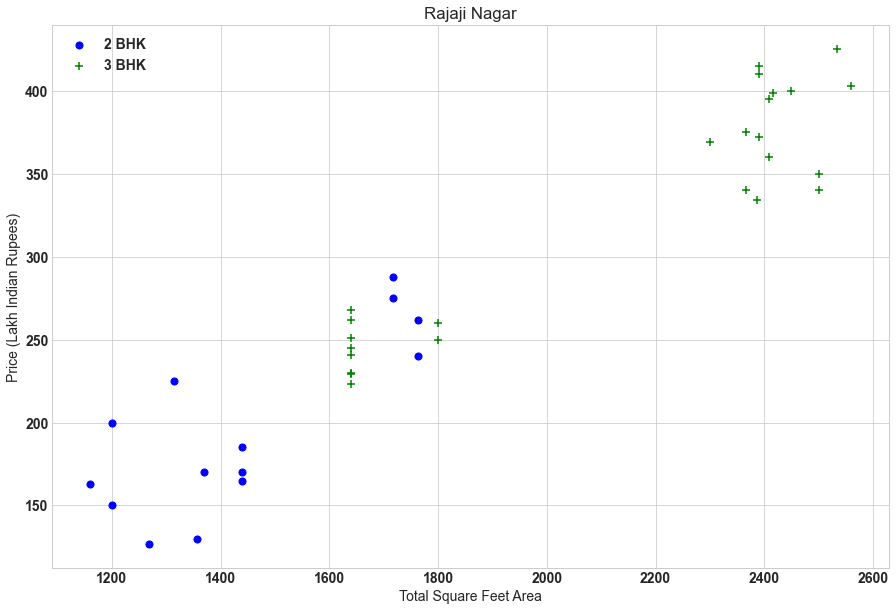

In [153]:
plot_scatter_chart(data,"Rajaji Nagar")

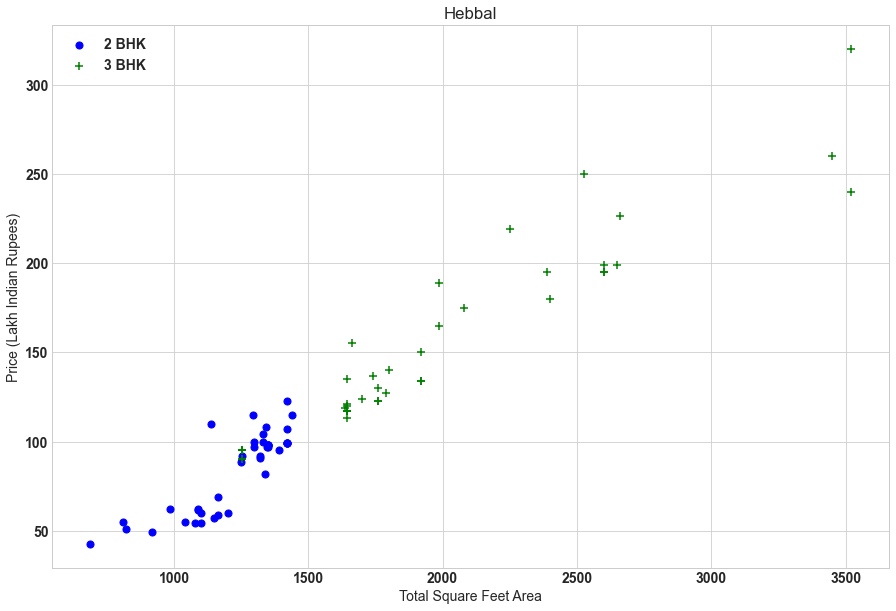

In [154]:
plot_scatter_chart(data,"Hebbal")

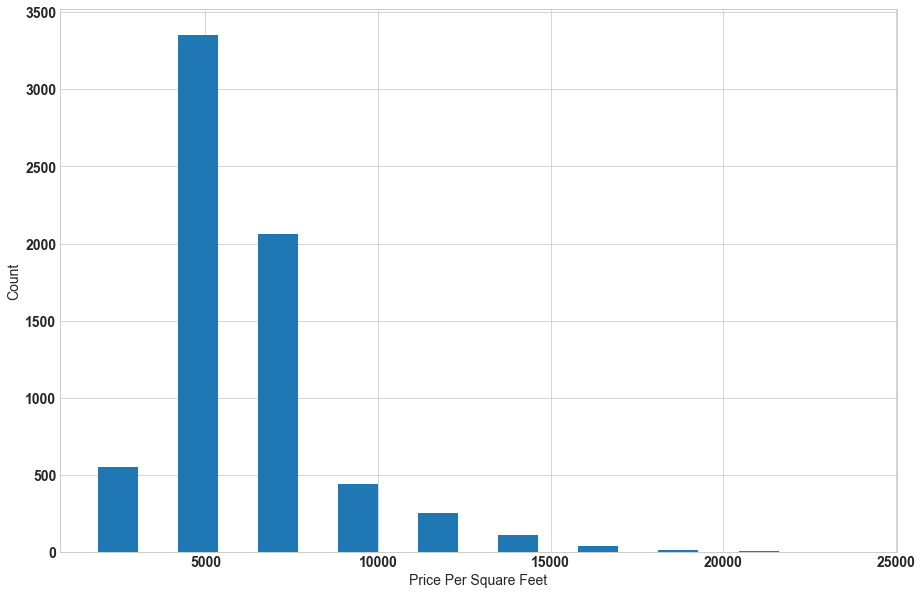

In [155]:
plt.hist(data.price_per_sqft,rwidth=0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

In [156]:
data.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

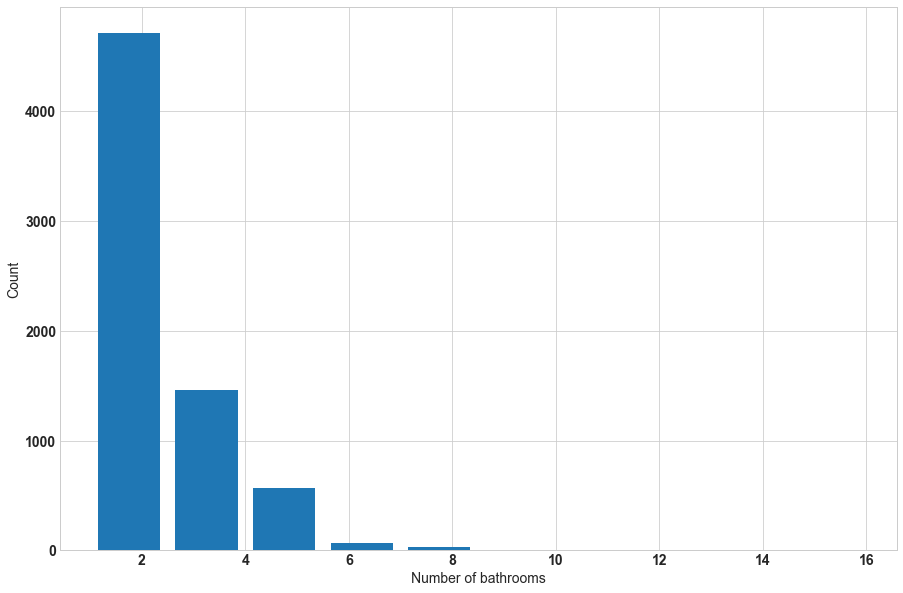

In [157]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

### Outlier Removal Using Bathrooms Feature

In [158]:
data.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [159]:
data[data['bath']>10]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5380,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8604,Super built-up Area,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8690,Super built-up Area,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9386,Super built-up Area,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9700,Super built-up Area,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


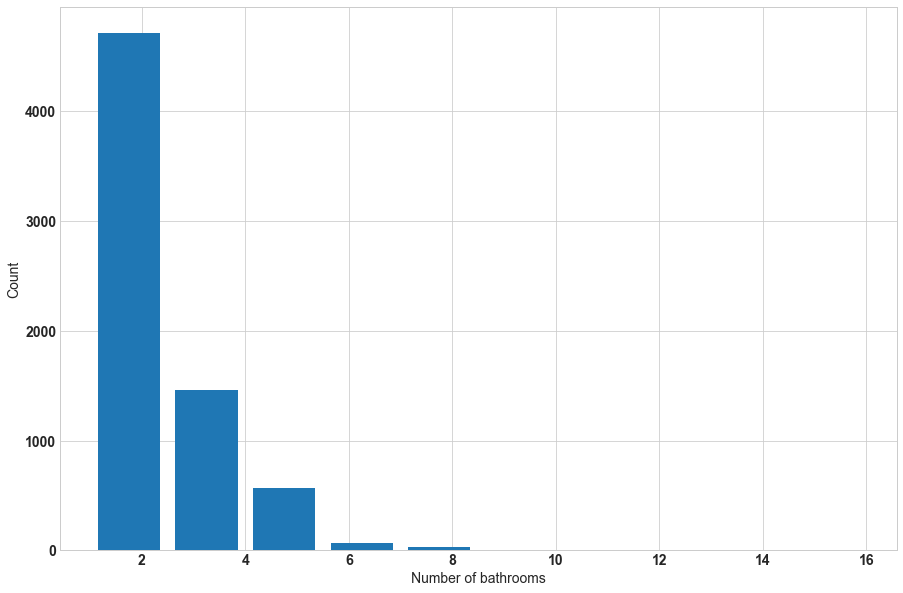

In [160]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [161]:
data[data['bath'] > data['bhk']+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1653,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5341,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6840,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


### If you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [162]:
data = data[data['bath']<data['bhk']+2]
data.shape


(6784, 8)

## One Hot Encoding

In [163]:
dummies = pd.get_dummies(data.location)
dummies1 = pd.get_dummies(data.area_type)

In [164]:
data= pd.concat([data,dummies.drop('other',axis='columns'),dummies1],axis='columns')
data

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,...,0,0,0,0,0,0,0,0,0,1
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10273,Carpet Area,other,2 BHK,1200.0,2.0,70.0,2,5833.333333,0,0,...,0,0,0,0,0,0,0,1,0,0
10274,Super built-up Area,other,1 BHK,1800.0,1.0,200.0,1,11111.111111,0,0,...,0,0,0,0,0,0,0,0,0,1
10277,Super built-up Area,other,2 BHK,1353.0,2.0,110.0,2,8130.081301,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,Plot Area,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443,0,0,...,0,0,0,0,0,0,0,0,1,0


In [165]:
data.drop(['area_type','location','size','price_per_sqft'],axis=1,inplace=True)

In [166]:
data.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Built-up  Area', 'Carpet  Area',
       'Plot  Area', 'Super built-up  Area'],
      dtype='object', length=262)

In [167]:
data.shape

(6784, 262)

## Clean Data

In [168]:
data.to_csv('Clean_Data.csv')

<AxesSubplot:xlabel='bhk', ylabel='price'>

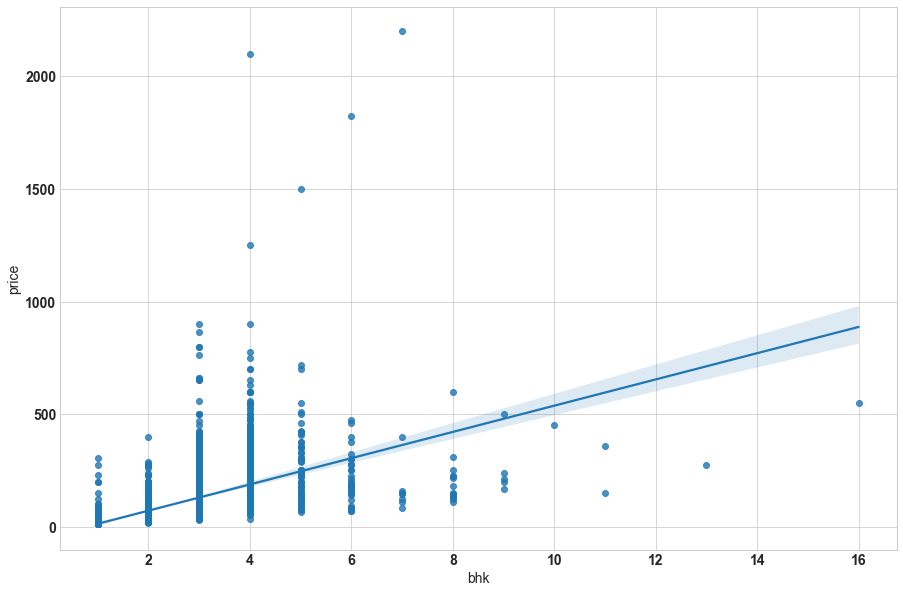

In [169]:
sns.regplot(data=data,x='bhk',y='price')

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

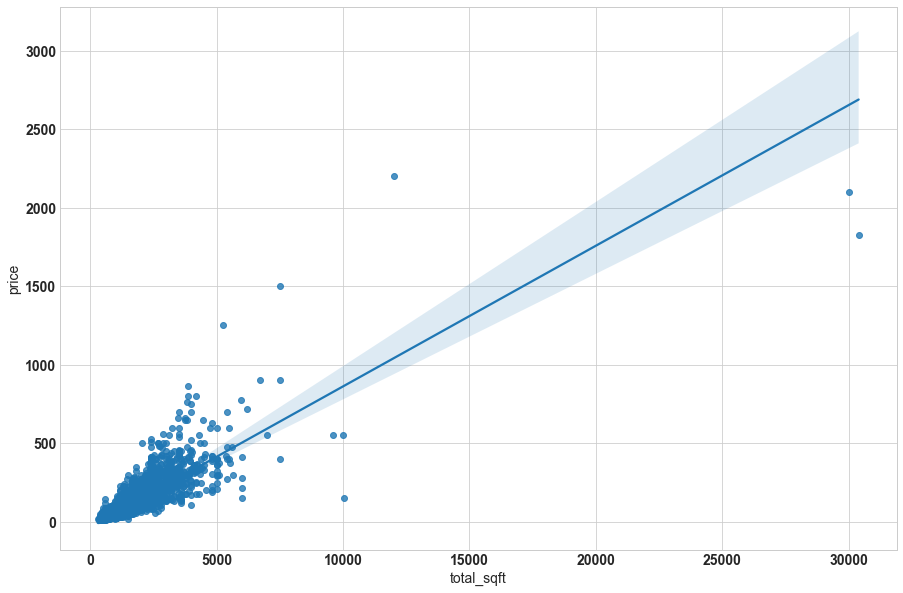

In [170]:
sns.regplot(data=data,x='total_sqft',y='price')

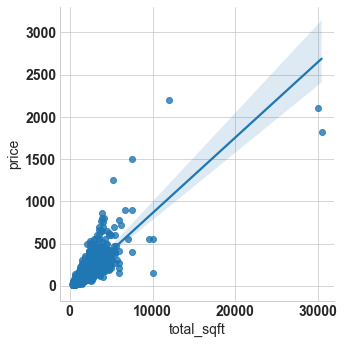

In [171]:
sns.lmplot(x='total_sqft',y='price',data=data)

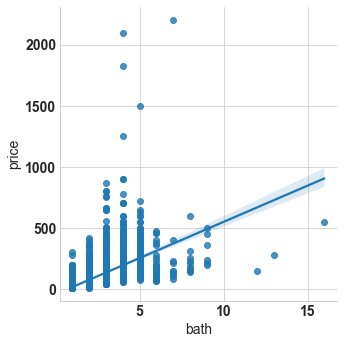

In [172]:
sns.lmplot(x='bath',y='price',data=data)

# Model Building

In [173]:
X = data.drop('price',axis=1)
y = data.price

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [175]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [176]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.8109632357770766


In [177]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [178]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.90550004, 0.868419  , 0.8610624 , 0.82473674, 0.80670329])

## Find best model using GridSearchCV

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'random_forest':{
            'model': RandomForestRegressor(),
            'params':{}
        
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'ridge': {
            'model':Ridge(),
            'params':{} 
        },
        'elasticNet': {
            'model':ElasticNet(),
            'params':{} 
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:

,model,best_score
0,linear_regression,0.853284
1,random_forest,0.801273
2,lasso,0.682644
3,decision_tree,0.777238
4,ridge,0.850200
5,elasticNet,0.679384


## Based on above results we can say that LinearRegression gives the best score. Hence we will use that

In [180]:
price_data = pd.DataFrame({'Actual Price': y_test, 'Predicted Price':lr.predict(X_test)})
price_data.head(10)

,Actual Price,Predicted Price
1189,115.00,81.737498
7841,78.00,72.147973
3662,260.50,238.545514
3391,55.15,60.629862
515,92.00,98.914500
1035,47.10,62.347188
1274,150.00,145.418611
9813,60.00,100.162361
1886,99.00,-89.235888
3750,55.00,48.723177


## Prediction Using Our Model

In [181]:
def predict_price(location,sqft,bath,bhk,area_type):    
    loc_index = np.where(X.columns==location)[0][0]
    area_index = np.where(X.columns == area_type)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1

    return np.round(lr.predict([x])[0]*1e5,2)


In [182]:
predict_price('1st Phase JP Nagar',1000, 2, 2,'Plot  Area')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


9140015.38

In [183]:
predict_price('1st Phase JP Nagar',1000, 3, 3,'Plot  Area')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


9458770.37

In [184]:
predict_price('Indira Nagar',1000, 2, 2,'Plot  Area')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


17804883.81

In [185]:
predict_price('Indira Nagar',1000, 3, 3,'Plot  Area')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


18123638.8

In [186]:
predict_price('Indira Nagar',1000, 4, 3,'Plot  Area')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


18555396.77

In [187]:
predict_price('Indira Nagar',1000, 10, 3,'Plot  Area') 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21145944.61

In [188]:
predict_price('Indira Nagar',1000, 10, 3,'Plot  Area') 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21145944.61